# Tarea 3 Mecánica Cuántica 1

### Parte c: Discretización para el dominio con N = 1000 puntos con  $$ -5 \leq x \leq 5$$

In [25]:
import numpy as np
from matplotlib import pyplot as plt
X = np.linspace(-5,5,1000)
print(X)

print(X[1]-X[0])

[-5.         -4.8989899  -4.7979798  -4.6969697  -4.5959596  -4.49494949
 -4.39393939 -4.29292929 -4.19191919 -4.09090909 -3.98989899 -3.88888889
 -3.78787879 -3.68686869 -3.58585859 -3.48484848 -3.38383838 -3.28282828
 -3.18181818 -3.08080808 -2.97979798 -2.87878788 -2.77777778 -2.67676768
 -2.57575758 -2.47474747 -2.37373737 -2.27272727 -2.17171717 -2.07070707
 -1.96969697 -1.86868687 -1.76767677 -1.66666667 -1.56565657 -1.46464646
 -1.36363636 -1.26262626 -1.16161616 -1.06060606 -0.95959596 -0.85858586
 -0.75757576 -0.65656566 -0.55555556 -0.45454545 -0.35353535 -0.25252525
 -0.15151515 -0.05050505  0.05050505  0.15151515  0.25252525  0.35353535
  0.45454545  0.55555556  0.65656566  0.75757576  0.85858586  0.95959596
  1.06060606  1.16161616  1.26262626  1.36363636  1.46464646  1.56565657
  1.66666667  1.76767677  1.86868687  1.96969697  2.07070707  2.17171717
  2.27272727  2.37373737  2.47474747  2.57575758  2.67676768  2.77777778
  2.87878788  2.97979798  3.08080808  3.18181818  3

Como podemos ver, el valor de nuestro h resulta siendo de 0.01, por lo que podemos decir que nuestro dominio se encuentra discretizado en 1000 puntos.

### Parte d: Defina una función que calcule el potencial para cada $x_i$ de la discretización.

Sabemos que para cada $x_i$ de la discretización, el potencial se calcula como: $$V_{terorica}(x_i) = \frac{1}{2}x_i^2$$  


In [26]:


def V(x):
    return 0.5*x**2

print(V(X))

[1.25000000e+01 1.20000510e+01 1.15103051e+01 1.10307622e+01
 1.05614223e+01 1.01022855e+01 9.65335170e+00 9.21462096e+00
 8.78609326e+00 8.36776860e+00 7.95964697e+00 7.56172840e+00
 7.17401286e+00 6.79650036e+00 6.42919090e+00 6.07208448e+00
 5.72518110e+00 5.38848077e+00 5.06198347e+00 4.74568922e+00
 4.43959800e+00 4.14370983e+00 3.85802469e+00 3.58254260e+00
 3.31726354e+00 3.06218753e+00 2.81731456e+00 2.58264463e+00
 2.35817774e+00 2.14391389e+00 1.93985308e+00 1.74599531e+00
 1.56234058e+00 1.38888889e+00 1.22564024e+00 1.07259463e+00
 9.29752066e-01 7.97112540e-01 6.74676053e-01 5.62442608e-01
 4.60412203e-01 3.68584838e-01 2.86960514e-01 2.15539231e-01
 1.54320988e-01 1.03305785e-01 6.24936231e-02 3.18845016e-02
 1.14784206e-02 1.27538006e-03 1.27538006e-03 1.14784206e-02
 3.18845016e-02 6.24936231e-02 1.03305785e-01 1.54320988e-01
 2.15539231e-01 2.86960514e-01 3.68584838e-01 4.60412203e-01
 5.62442608e-01 6.74676053e-01 7.97112540e-01 9.29752066e-01
 1.07259463e+00 1.225640

### Parte e: Defina una funcion (metodo de Numerov) que tenga como parametros la discretizacion y un valor de energıa especıfico

-42.66580539817633
-17.31607690496499
-1.6832953664397456
-0.49383522721426587
-0.05198629297362299
-0.006391700642343699


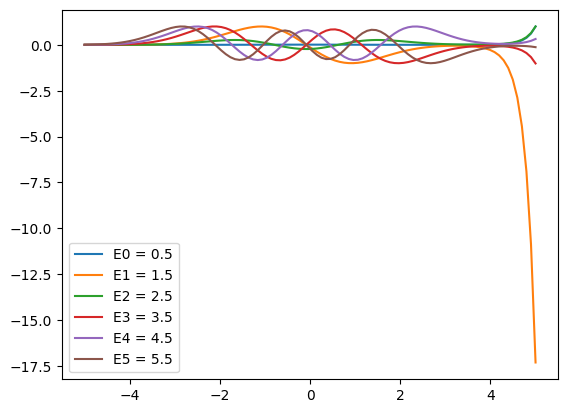

In [27]:
def Numerov(X, E):
    h = X[1]-X[0]
    Y = np.zeros(len(X))
    Y[0] = 0
    Y[1] = 1*10**(-5)	
    for i in range(2,len(X)):
        num1 = 2*(1+((5/12)*(h**2)*2*((V(X[i]))-(E))))*Y[i-1]
        num2 = (1-(1/12)*(h**2)*2*((V(X[i-2]))-(E)))*Y[i-2]
        denom = 1-(1/12)*(h**2)*2*((V(X[i]))-(E))
        Y[i] = (num1-num2)/denom
    #Normalizar
    #Y = Y/np.sqrt(np.sum(Y**2))
    return Y/max(Y)



Y1 = Numerov(X, 0.5)
V1 = Y1[-1]
Y1comp = Numerov(X, 0.5+ 0.001)
V11 = Y1comp[-1]
print(V1*V11)
Y2 = Numerov(X, 1.5)
V2 = Y2[-1]
Y2comp = Numerov(X, 1.5+ 0.001)
V22 = Y2comp[-1]
print(V2*V22)
Y3 = Numerov(X, 2.5)
V3 = Y3[-1]
Y3comp = Numerov(X, 2.5+ 0.001)
V33 = Y3comp[-1]
print(V3*V33)
Y4 = Numerov(X, 3.5)
V4 = Y4[-1]
Y4comp = Numerov(X, 3.5+ 0.001)
V44 = Y4comp[-1]
print(V4*V44)
Y5 = Numerov(X, 4.5)
V5 = Y5[-1]
Y5comp = Numerov(X, 4.5+ 0.001)
V55 = Y5comp[-1]
print(V5*V55)
Y6 = Numerov(X, 5.5)
V6 = Y6[-1]
Y6comp = Numerov(X, 5.5+ 0.001)
V66 = Y6comp[-1]
print(V6*V66)

plt.plot(X,Y1, label = "E0 = 0.5")
plt.plot(X,Y2, label = "E1 = 1.5")
plt.plot(X,Y3, label = "E2 = 2.5")
plt.plot(X,Y4, label = "E3 = 3.5")
plt.plot(X,Y5, label = "E4 = 4.5")
plt.plot(X,Y6, label = "E5 = 5.5")
plt.legend()
plt.show()
